# Data augmentation

## Rotation
Al rotar quedan espacios en negro, en keras se puede usar el modo ```fill_mode = nearest```, para llenar los espacios

## Reflect
Refleja tipo espejo la imagen ```fill_mode = reflect```

## wrap
Hace una tira consecutiva de la imagen ```fill_mode = wrap```

## Desplazar
Desplazar sobre el ancho y el alto de la imagen ```width_shift_range``` y ```height_shift_range```

## Aumento brillo
Puedo aumenta el brillo ```brightness_range```

## Zoom
Se puede aumentar el tamaño de la imagen```zoom_range```

# Aplicacion de data augmentation

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt

In [8]:
data = ImageDataGenerator(rotation_range=40, 
                          width_shift_range=0.2, 
                          height_shift_range=0.2, 
                          zoom_range=0.2, 
                          horizontal_flip=True, 
                          fill_mode="nearest", 
                          brightness_range=[0.4,1.5])
img = load_img("./src/cnn-data-sources/Mara.jpeg")
x = img_to_array(img)

print(x.shape)

x = x.reshape((1,)+x.shape)
print(x.shape)

(800, 600, 3)
(1, 800, 600, 3)


0
1
2
3
4
5
6
7
8
9


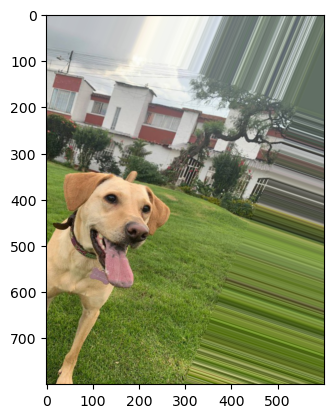

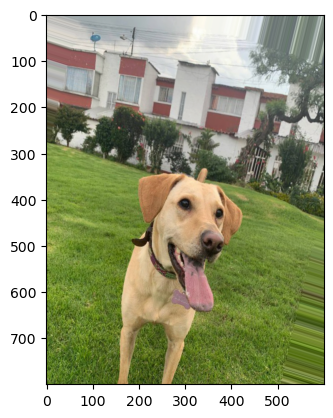

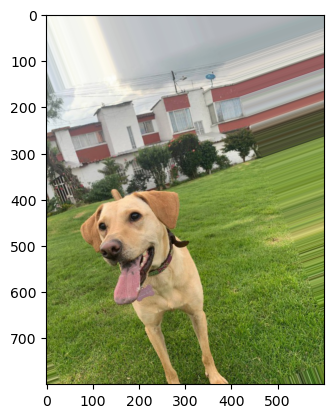

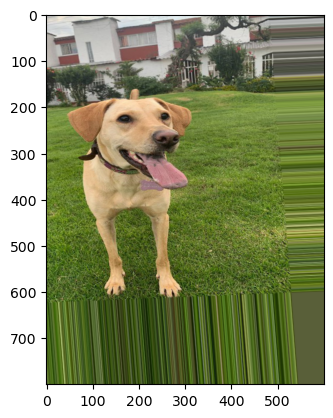

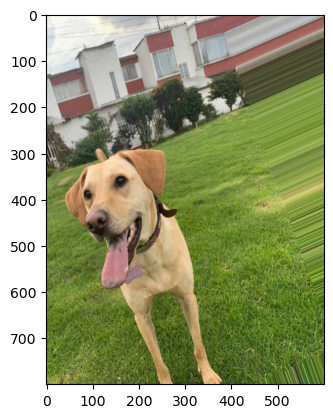

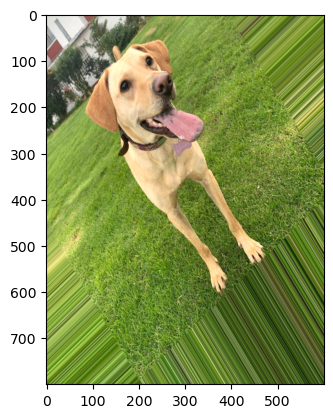

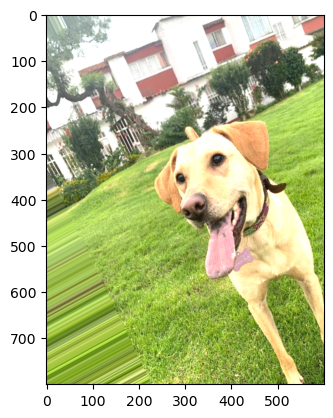

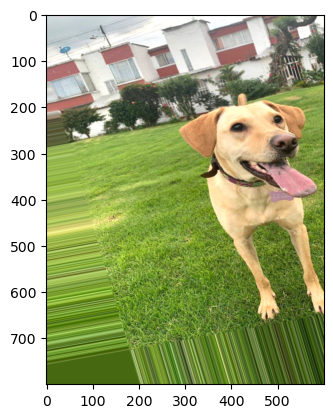

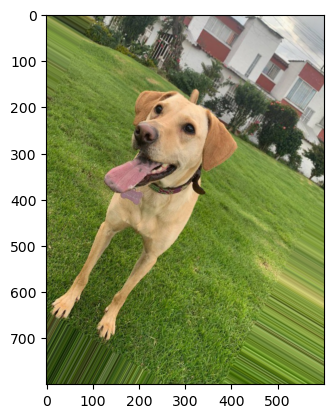

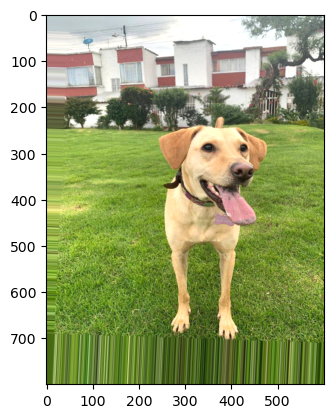

In [11]:
i=0
for batch in data.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(array_to_img(batch[0]))
    i+=1
    if i % 10 == 0:
        break

plt.show()

In [12]:
# Cuando las imagenes estan en directorios
train_generator = data.flow_from_directory("./src/cnn-data-sources/cats_and_dogs/train/",
                                           target_size=(150,150),
                                           batch_size=32,
                                           class_mode='binary')

Found 2000 images belonging to 2 classes.


In [13]:
train_generator[0][0].shape

(32, 150, 150, 3)

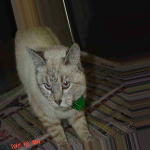

In [15]:
array_to_img(train_generator[0][0][2])